### Solution Day 2Excercise 1

Read the image building.jpg inside Day2 folder. Apply following operations on this image.

1. Flip the image along horzontal axis
2. Fill small gaps in the image.
3. Blur the image.
4. Decrease the brightness in the image
5. Add noise to the image
6. Find vertical edges on the image. 
7. Find horizontal edges on the image.
8. Find closed regions in the image.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
building=plt.imread('building.jpg')

1. Flip the image along horzontal axis

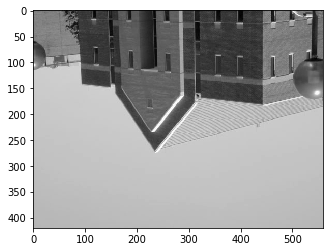

In [5]:
# Horizontal Flip 
h_flip=np.flip(building,axis=0)
plt.imshow(h_flip, cmap = 'gray')

2. Fill small gaps in the image.
Filling small gaps needs dilation

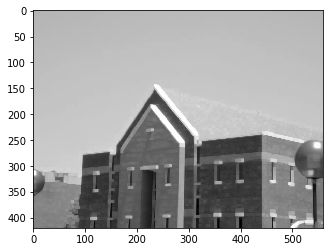

In [8]:
from skimage.morphology import dilation
from skimage.morphology import disk, square
selem = square(5)
dilated = dilation(building, selem)
plt.imshow(dilated, cmap = 'gray')

3. Blur the image

Apply median filtering

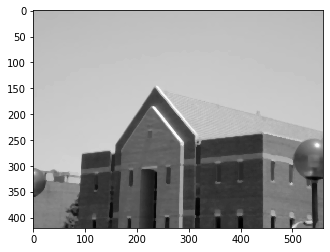

In [15]:
from skimage.filters import median
bd=np.array(building)
selem = square(5)
med_img = median(bd,selem)
plt.imshow(med_img,cmap='gray')

5. Decrease the brightness in the image ---Perform gamma correction

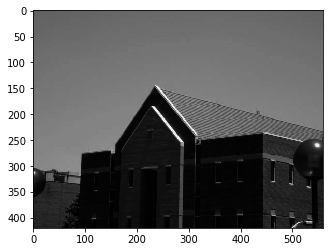

In [27]:
from skimage import data, exposure, img_as_float
image = img_as_float(building)
gamma_corrected = exposure.adjust_gamma(image, 3)
plt.imshow(gamma_corrected,cmap='gray')

Add noise to the image

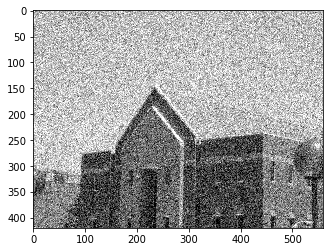

In [29]:
from skimage.util import random_noise  # adding random noise in image
sigma = 0.155
noisy = random_noise(building, var=sigma**2)  # random_noise function adds noise in original image
plt.imshow(noisy,cmap='gray')

6. Find vertical edges on the image. 

   Vertical Sobel filter

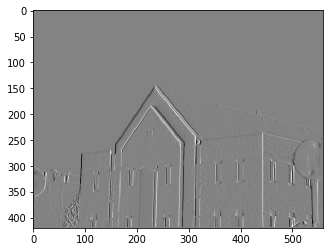

In [32]:
from skimage import data
from skimage.filters import sobel_v # for vertical and horizontal operation
med_v = sobel_v(building)
plt.imshow(med_v,cmap='gray')

7. Find horizontal edges on the image.

Horizontal sobel filter

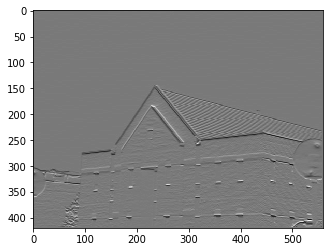

In [33]:
from skimage import data
from skimage.filters import sobel_h # for vertical and horizontal operation
med_h = sobel_h(building)
plt.imshow(med_h,cmap='gray')

8. Find closed regions in the image.

Apply canny Edge detector
and  fill holes(closed regions)

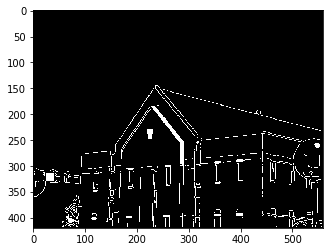

In [36]:
from skimage.feature import canny
edges = canny(building/255.)   # canny function for edge based segmentation 
from scipy import ndimage as ndi
fill_edges = ndi.binary_fill_holes(edges)
plt.imshow(fill_edges,cmap='gray')